In [13]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor







In [4]:
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-11-01 13:33:57,862: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
api = 'e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d'

In [139]:
import numpy as np


def Pauli(j):
    if j == 0:
        return np.array([[1, 0], [0, 1]])
    elif j == 1:
        return np.array([[0, 1], [1, 0]])
    elif j == 2:
        return np.array([[0, -1j], [1j, 0]])
    elif j == 3:
        return np.array([[1, 0], [0, -1]])




In [140]:
def trace(A):
    tr = 0
    for i in range(len(A)):
        tr+= A[i][i] 
    return(tr)



In [141]:
def normTr(d, A):
    ev = np.linalg.eigvalsh(A)
    Ntr = 0
    for j in range(0, d):
        Ntr += abs(ev[j]) #calculate the sum of all absolute values 
    return Ntr

In [142]:
def negativity(d, rhoTp):
    En = 0.5*(normTr(d, rhoTp) - 1.0)
    return En





In [143]:
#maximizing a  bell state:
#This cell makes measurements in x,y,and z bases 


#variation_A_Hadamard_and_CNOT

#n is number of qubits
n = 2
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = []

for i in range(3**n):
    qc.append(QuantumCircuit(q, c))
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    qc[i].h(0)
    qc[i].barrier(0,1)
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    qc[i].cx(0,1)
    qc[i].barrier(0,1)
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    
    


count = 0 #count refers to the total number of circuits.
for i in range(3):
    for j in range(3):
        if i == 0: 
            qc[count].h(0)
        elif i == 1:
            qc[count].s(0).inverse()
            qc[count].h(0)
        if j == 0:
            qc[count].h(1)
        elif j == 1:
            qc[count].s(1).inverse()
            qc[count].h(1)
        count += 1
        
for i in range(3**n):
    qc[i].measure(q,c)

  



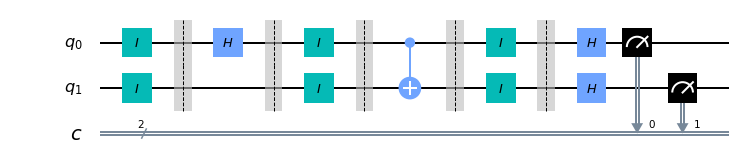

In [144]:
qc[0].draw(output = 'mpl')

In [145]:
qc

In [ ]:
backend = provider.get_backend('ibmq_valencia')
output = []
n = 75 # total number of circuits for each number of identity gates. 
for i in range(n):
    job_exp = qiskit.execute(qc,backend=backend,shots = 8132)
    print(i)
    job_monitor(job_exp)
    output = job_exp.result().get_counts()
    df = pd.DataFrame(output)
    df.to_csv(path  + "var_A_H&C" + str(i)+ ".csv") ##variation_A_Hadamard_and_CNOT


    










0
Job Status: job has successfully run
1
Job Status: job has successfully run
2
Job Status: job has successfully run
3
Job Status: job has successfully run                        
4
Job Status: job is queued (2) [Est. wait time: 27 sec]      

#Automation planning:
1) Place id_gates in 5 positions of the circuit
2) write a code that does this in a single run. 


In [12]:
backend = provider.get_backend('ibmq_valencia')
from qiskit.providers.ibmq.job import job_monitor
from qiskit.visualization import plot_histogram

job_exp = qiskit.execute(qc,backend=backend, shots = 8132)



In [13]:
job_monitor(job_exp)

Job Status: job has successfully run


In [14]:
output = job_exp.result().get_counts()
output

NameError: name 'job_exp' is not defined

In [15]:
output = [{'00': 3679, '11': 4028, '01': 250, '10': 175},
 {'00': 2099, '11': 2150, '01': 2169, '10': 1714},
 {'00': 2051, '11': 1946, '01': 2282, '10': 1853},
 {'00': 2118, '11': 2090, '01': 1833, '10': 2091},
 {'00': 347, '11': 94, '01': 3888, '10': 3803},
 {'00': 2118, '11': 1811, '01': 2112, '10': 2091},
 {'00': 2122, '11': 1998, '01': 1902, '10': 2110},
 {'00': 2045, '11': 1853, '01': 2149, '10': 2085},
 {'00': 4049, '11': 3700, '01': 227, '10': 156}]

In [146]:
#sorts the output based on tuples

def sort_output(data):
    sorted_output = []
    for i in range(len(output)):
        sorted_output.append(sorted(output[i].items()))
    return(sorted_output)




In [17]:
sort_output(output)

[[('00', 3679), ('01', 250), ('10', 175), ('11', 4028)],
 [('00', 2099), ('01', 2169), ('10', 1714), ('11', 2150)],
 [('00', 2051), ('01', 2282), ('10', 1853), ('11', 1946)],
 [('00', 2118), ('01', 1833), ('10', 2091), ('11', 2090)],
 [('00', 347), ('01', 3888), ('10', 3803), ('11', 94)],
 [('00', 2118), ('01', 2112), ('10', 2091), ('11', 1811)],
 [('00', 2122), ('01', 1902), ('10', 2110), ('11', 1998)],
 [('00', 2045), ('01', 2149), ('10', 2085), ('11', 1853)],
 [('00', 4049), ('01', 227), ('10', 156), ('11', 3700)]]

In [149]:
#takes the probabilities from the sorted_output and gives an array in sorted order.
def probability(sorted_output):
    ns = 8132
    values = []
    for i in range(len(sorted_output)):
        for j in range(4):
            values.append(sorted_output[i][j][1]/ns)
    p = np.array(values)
    p
    return(p)
    

In [148]:
p = probability(sort_output(output))
p

array([0.43679292, 0.02852927, 0.02164289, 0.51303492, 0.25627152,
       0.27238072, 0.21741269, 0.25393507, 0.2461879 , 0.28246434,
       0.22233153, 0.24901623, 0.25725529, 0.21962617, 0.26660108,
       0.25651746, 0.04328578, 0.47319233, 0.47085588, 0.01266601,
       0.25258239, 0.26783079, 0.26733891, 0.21224791, 0.25454993,
       0.22319233, 0.26414166, 0.25811608, 0.24569602, 0.27336449,
       0.26500246, 0.21593704, 0.50750123, 0.02656173, 0.02176586,
       0.44417118])

In [150]:
#density operator reconstruction begins here. 
#Outputs probability coefficient using probability from IBM Q as input

def prob_coeff(p):
    d1 = np.eye(4)
    ab = [1, -1]
    A = []
    for i in range(1,4):
        for j in range(1,4):
            for a in ab :
                for b in ab :
                    B = []
                    for al in range(4):
                        for be in range(4):
                            mat = (d1[al][0] + a* d1[al][i]) * (d1[be][0] + b* d1[be][j])/4
                            #mat = (int(d0[al]) + a* int(d1[i][al])) * (int(d0[be]) + b*int(d1[j][be]))/4 
                            B.append(mat)
                    A.append(B) #We append our matrix here because we need 16 different elements of c_s so that we don't need to reshape
    M = np.array(A, dtype = float)
    M_inv = np.linalg.pinv(M)
    C = np.matmul(M_inv, p)
    return(C)


#This is the rho equation which takes the prob coefficients (C) as its input
def rho_eq(C):
    B = []
    d = 0
    for al in range(4):
        for be in range(4):
            rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
            d = d + 1
            B.append(rho_q2)
    
    
    return(B)

rho = np.zeros((4,4))
for i in range(len(B)):
    rho = rho + B[i]
rho

#We combine these two parts to create the function below. 




In [152]:
#This is the rho equation which takes the prob coefficients (C) as its input and returns the reconstructed density operator
def rho_eq(C):
    B = []
    d = 0
    rho = np.zeros((4,4))
    for al in range(4):
        for be in range(4):
            rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
            d = d + 1
            B.append(rho_q2)
        
    for i in range(len(B)):
        rho = rho + B[i]
    return(rho)







In [72]:
den_op = rho_eq(Coeff)
den_op


array([[ 0.48497705+0.j        ,  0.00530825+0.01248155j,
         0.0025619 +0.00395557j,  0.44675357-0.01998278j],
       [ 0.00530825-0.01248155j,  0.02715609+0.j        ,
         0.00098377+0.00252091j,  0.01104689-0.01289146j],
       [ 0.0025619 -0.00395557j,  0.00098377-0.00252091j,
         0.01994179+0.j        , -0.00133219-0.00817757j],
       [ 0.44675357+0.01998278j,  0.01104689+0.01289146j,
        -0.00133219+0.00817757j,  0.46792507+0.j        ]])

In [153]:
#takes the reconstructed density operator as its input and changes the list with negative eigenvalues to positive.
def pos_eigval_creater(den_op):
    a = 0
    eigval = np.linalg.eigvalsh(den_op)
    meu = sorted(eigval, reverse = True)
    lmd = np.zeros(len(meu))
    count = 0
    for i in reversed(range(len(meu))) :
        if (meu[i].real + a/(i+1)) < 0:
            lmd[i] = 0
            a += lmd[i] + meu[i]
            lmd[i-1] = meu[i-1].real + a
            count = count + 1

        else:
            lmd[i] = meu[i].real + a/(count+1)
    return(lmd)
        

In [154]:
#This function takes our reconstructed density operator and updates it with new eigenvalues 
def rho_updated_meu(den_op,lmd):  #lmd is the new eigenvalue which is the output of  pos_eigval_creater(rho)
    matrix = np.zeros((2**n,2**n))
    eigval, eigvecs = np.linalg.eig(rho)
    for i in range(len(lmd)):
        matrix = matrix + lmd[i]* np.outer(eigvecs[i] , eigvecs[i])
    return(matrix)



In [59]:
lmd =  pos_eigval_creater(rho)
rho_updated_meu(rho,lmd)

array([[ 0.47926326+0.00075948j, -0.35055673-0.05351065j,
         0.22388438+0.07505597j, -0.13080277+0.08245219j],
       [-0.35055673-0.05351065j,  0.27899626+0.08580631j,
        -0.15263954-0.08998446j,  0.10713003-0.0581021j ],
       [ 0.22388438+0.07505597j, -0.15263954-0.08998446j,
         0.12236548+0.0780478j , -0.07933153+0.01559358j],
       [-0.13080277+0.08245219j,  0.10713003-0.0581021j ,
        -0.07933153+0.01559358j,  0.04364347-0.04620953j]])

In [155]:
def matrix_to_list(rho):
    rho_list = []
    for i in range(len(rho)):
        for j in range(len(rho[0])):
            rho_list.append(rho[i][j])
    return(rho_list)



In [156]:
def partial_transpose(rho_lst, q):#This function computes the partial transpose of a matrix. 
    z = np.array([1,0])
    o = np.array([0,1])
    lst = [z,o]
    M = np.zeros((4,4))
    dd = 0
    for i in lst:
        for j in lst:
            for i1 in lst:
                for j1 in lst:
                    if q == 0:
                        M = M + rho_lst[dd] * np.kron(np.outer(i1,i),np.outer(j,j1))
                    elif q == 1:
                        M = M + rho_lst[dd] * np.kron(np.outer(i,i1),np.outer(j1,j))
                    dd = dd + 1
    return(M)               
                

In [157]:
#How do I incorporate new eigenvalues to the density operator 

In [68]:
rho_lst = matrix_to_list(rho_updated)
rhoTp = partial_transpose(rho_lst, 1)

In [70]:
negativity(4, rhoTp)

0.42415157720449836

In [158]:
def csv_to_dict(filename, PATH):  
    outcome = []
    output = []
    import csv
    with open(PATH + filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            row = row[1:5]
            outcome.append(row)

    for i in range(1,len(outcome)):
        for j in range(len(outcome[0])):
            if outcome[i][j] == '':
                outcome[i][j] = 0
            else:    
                outcome[i][j] = int(float(outcome[i][j]))
        output.append(dict(zip(outcome[0], outcome[i])))
    return output       
        

In [172]:
path1 =  '/Users/student/Documents/summer_research/circuit_results/project1_files/Entanglement_negativity/' 

In [186]:
#define your path1 and q.
def ET_for_all(path):
    ET_list = []
    for i in range(0,8):
        q = 1
        raw_data = csv_to_dict("var_A_H&C" + str(i)+ ".csv", path1)

        p = probability(sort_output(raw_data))

        Coeff = prob_coeff(p)

        den_op = rho_eq(Coeff)

        lmd = pos_eigval_creater(den_op)
        rho_with_meu = rho_updated_meu(den_op,lmd)

        rho_lst = matrix_to_list(rho_with_meu)

        rhoTp = partial_transpose(rho_lst, q)

        ET_list.append(negativity(4, rhoTp))

    return ET_list




In [187]:
ET_for_all(path1)

[0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551]

In [188]:
df = pd.DataFrame(ET_for_all(path1))
df.to_csv(path1 +  "ET_for_var_A_H&C.csv")

In [185]:
#define your path1 and q.
ET_list = []
for i in range(0,8):
    q = 1
    a = csv_to_dict("var_A_H&C" + str(i)+ ".csv", path1)

    b = probability(sort_output(a))

    c = prob_coeff(b)

    d = rho_eq(c)

    l = pos_eigval_creater(d)
    e = rho_updated_meu(d,l)

    f = matrix_to_list(e)

    g = partial_transpose(f, q)

    ET_list.append(negativity(4, g))
    
ET_list






[0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551,
 0.07587264862461551]

In [170]:
for i in range(0,8):
    print("var_A_H&C" + str(i)+ ".csv")



var_A_H&C0.csv
var_A_H&C1.csv
var_A_H&C2.csv
var_A_H&C3.csv
var_A_H&C4.csv
var_A_H&C5.csv
var_A_H&C6.csv
var_A_H&C7.csv


In [126]:
ET = negativity(4, rhoTp)
ET




0.07587264862461551

In [125]:
rhoTp = partial_transpose(rho_lst, q)
rhoTp



array([[ 0.47908931+0.00073098j, -0.35094499-0.05356258j,
         0.22410818+0.07518791j, -0.15343509-0.09014205j],
       [-0.35094499-0.05356258j,  0.27813105+0.08586646j,
        -0.13093486+0.08250977j,  0.10716617-0.05850361j],
       [ 0.22410818+0.07518791j, -0.13093486+0.08250977j,
         0.12141687+0.07804263j, -0.07831028+0.01587959j],
       [-0.15343509-0.09014205j,  0.10716617-0.05850361j,
        -0.07831028+0.01587959j,  0.04539431-0.04631804j]])

In [124]:
rho_lst = matrix_to_list(rho_with_meu)
rho_lst

[(0.4790893103632011+0.0007309769341719475j),
 (-0.350944986091962-0.053562576684338316j),
 (0.22410818249587244+0.07518790763955646j),
 (-0.1309348556527424+0.08250977462279772j),
 (-0.350944986091962-0.053562576684338316j),
 (0.2781310528434206+0.08586645681159051j),
 (-0.15343509204122588-0.09014204889521917j),
 (0.1071661708134746-0.05850360980802787j),
 (0.22410818249587244+0.07518790763955646j),
 (-0.15343509204122588-0.09014204889521917j),
 (0.12141686994318804+0.0780426349999431j),
 (-0.07831027728728521+0.015879590274507294j),
 (-0.1309348556527424+0.08250977462279772j),
 (0.1071661708134746-0.05850360980802787j),
 (-0.07831027728728521+0.015879590274507294j),
 (0.04539431135853314-0.046318039647002714j)]

In [123]:
rho_with_meu = rho_updated_meu(den_op,lmd)
rho_with_meu



array([[ 0.47908931+0.00073098j, -0.35094499-0.05356258j,
         0.22410818+0.07518791j, -0.13093486+0.08250977j],
       [-0.35094499-0.05356258j,  0.27813105+0.08586646j,
        -0.15343509-0.09014205j,  0.10716617-0.05850361j],
       [ 0.22410818+0.07518791j, -0.15343509-0.09014205j,
         0.12141687+0.07804263j, -0.07831028+0.01587959j],
       [-0.13093486+0.08250977j,  0.10716617-0.05850361j,
        -0.07831028+0.01587959j,  0.04539431-0.04631804j]])

In [122]:
lmd = pos_eigval_creater(den_op)
lmd

array([0.92462436, 0.03208233, 0.02614401, 0.0171493 ])

In [119]:
den_op = rho_eq(Coefficients)

den_op

array([[ 0.48393179+0.j        ,  0.00649697+0.01942941j,
         0.00137318+0.01528939j,  0.44693802-0.01198967j],
       [ 0.00649697-0.01942941j,  0.02635678+0.j        ,
         0.00288982-0.00178308j,  0.00616904-0.01988031j],
       [ 0.00137318-0.01528939j,  0.00288982+0.00178308j,
         0.02197081+0.j        , -0.00616904-0.01893753j],
       [ 0.44693802+0.01198967j,  0.00616904+0.01988031j,
        -0.00616904+0.01893753j,  0.46774061+0.j        ]])

In [118]:
Coefficients = prob_coeff(p)
Coefficients


array([ 1.00000000e+00,  6.55845221e-04, -9.83767831e-04,  1.18052140e-02,
        1.50844401e-02,  8.99655681e-01,  2.04131825e-02, -9.59173635e-03,
        9.18183309e-03,  2.75454993e-02, -8.88096409e-01, -7.03393999e-02,
        2.05771438e-02,  2.53320216e-02, -7.67338908e-02,  9.03344811e-01])

In [108]:
sort_output(raw_data)

[[('00', 3552), ('01', 232), ('10', 176), ('11', 4172)],
 [('00', 2084), ('01', 2215), ('10', 1768), ('11', 2065)],
 [('00', 2002), ('01', 2297), ('10', 1808), ('11', 2025)],
 [('00', 2092), ('01', 1786), ('10', 2168), ('11', 2086)],
 [('00', 352), ('01', 3848), ('10', 3829), ('11', 103)],
 [('00', 2054), ('01', 2178), ('10', 2174), ('11', 1726)],
 [('00', 2070), ('01', 1815), ('10', 2148), ('11', 2099)],
 [('00', 1998), ('01', 2223), ('10', 2155), ('11', 1756)],
 [('00', 4127), ('01', 216), ('10', 177), ('11', 3612)]]

In [93]:
raw_data

[{'00': 3552, '11': 4172, '01': 232, '10': 176},
 {'00': 2084, '11': 2065, '01': 2215, '10': 1768},
 {'00': 2002, '11': 2025, '01': 2297, '10': 1808},
 {'00': 2092, '11': 2086, '01': 1786, '10': 2168},
 {'00': 352, '11': 103, '01': 3848, '10': 3829},
 {'00': 2054, '11': 1726, '01': 2178, '10': 2174},
 {'00': 2070, '11': 2099, '01': 1815, '10': 2148},
 {'00': 1998, '11': 1756, '01': 2223, '10': 2155},
 {'00': 4127, '11': 3612, '01': 216, '10': 177}]

In [168]:
raw_data = csv_to_dict("var_A_H&C" + str(1)+ ".csv", path1)



In [180]:
raw_data

[{'00': 3683, '11': 4011, '01': 225, '10': 213},
 {'00': 2093, '11': 2107, '01': 2095, '10': 1837},
 {'00': 2010, '11': 2070, '01': 2225, '10': 1827},
 {'00': 2084, '11': 2069, '01': 1826, '10': 2153},
 {'00': 344, '11': 73, '01': 3938, '10': 3777},
 {'00': 2077, '11': 1800, '01': 2116, '10': 2139},
 {'00': 2074, '11': 2084, '01': 1827, '10': 2147},
 {'00': 2084, '11': 1820, '01': 2102, '10': 2126},
 {'00': 4101, '11': 3656, '01': 212, '10': 163}]